# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [2]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [2]:
a = torch.FloatTensor(3,4)
b = torch.FloatTensor(12)

In [5]:
print(a)
print(b)

tensor([[-2.2037e+38,  3.0773e-41,  3.7835e-44,  0.0000e+00],
        [        nan,  0.0000e+00,  1.3733e-14,  6.4069e+02],
        [ 4.3066e+21,  1.1824e+22,  4.3066e+21,  6.3828e+28]])
tensor([-2.2037e+38,  3.0773e-41,  3.9236e-44,  0.0000e+00,         nan,
         0.0000e+00,  1.3733e-14,  1.2102e+25,  1.6992e-07,  2.9599e+21,
         2.8175e+20,  1.7566e+25])


In [6]:
a[:, 0]

tensor([-2.2037e+38,         nan,  4.3066e+21])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [7]:
a, b = torch.FloatTensor(5,2), torch.FloatTensor(1, 10)
c = b.view(5, 2)
print(a)
print(b)
print(c)

tensor([[-2.2047e+38,  3.0773e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  0.0000e+00],
        [ 4.4721e+21,  1.5956e+25],
        [ 4.7399e+16,  1.4917e-07]])
tensor([[-2.2047e+38,  3.0773e-41,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
tensor([[-2.2047e+38,  3.0773e-41],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]])


In [8]:
print(a.add(c))
print(a.sub(c))
print(a.mul(c))
print(a.div(c))

tensor([[      -inf, 6.1545e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [4.4721e+21, 1.5956e+25],
        [4.7399e+16, 1.4917e-07]])
tensor([[-2.5961e+33,  0.0000e+00],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  0.0000e+00],
        [ 4.4721e+21,  1.5956e+25],
        [ 4.7399e+16,  1.4917e-07]])
tensor([[inf, 0.],
        [0., 0.],
        [nan, 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1.0000, 1.0000],
        [   inf,    nan],
        [   nan,    nan],
        [   inf,    inf],
        [   inf,    inf]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


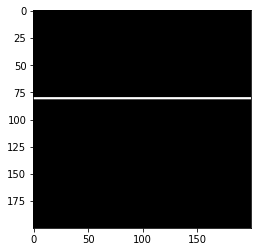

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


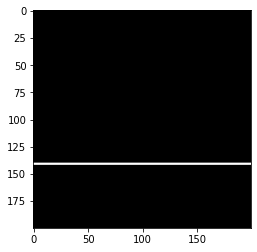

In [3]:
images = torch.FloatTensor(100, 200, 200, 3).zero_()

for i in range(0, len(images)):
  images[i][i*2] = torch.FloatTensor(200, 3).fill_(255)
  images[i][i*2+1] = torch.FloatTensor(200, 3).fill_(255)

plt.imshow(images[40])
plt.show()

plt.imshow(images[70])
plt.show()  

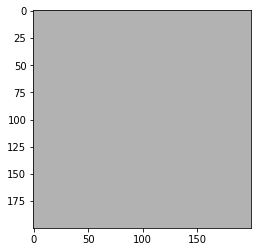

In [4]:
plt.imshow((images.float().mean(0) * 70).int())
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [3]:
from torch.autograd import Variable

In [11]:
a = torch.FloatTensor(2, 3, 4).uniform_()
b = torch.FloatTensor(1, 8, 3).uniform_()

c = b.reshape(2, 3, 4)

a = a.cpu()
c = c.cpu()

a = Variable(a, requires_grad=False)
c = Variable(c, requires_grad=True)

L = torch.mean((c - a)**2)
L.backward()

c.grad

tensor([[[-0.0098,  0.0321, -0.0445,  0.0055],
         [ 0.0376, -0.0036, -0.0784,  0.0207],
         [ 0.0200,  0.0058,  0.0522, -0.0035]],

        [[ 0.0088, -0.0088, -0.0092,  0.0341],
         [-0.0104, -0.0198,  0.0630, -0.0074],
         [-0.0091,  0.0369, -0.0594,  0.0310]]])